In [1]:
filename = 'system_id20230209-140201.csv'

In [2]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv(filename)


In [4]:
data.to_csv(filename, index=False)

In [5]:
data.head()

,throttle,steer,accel,v,w
0,0.0,0.0,0.176596,0.000604,0.000645
1,0.0,0.0,-0.086928,-0.000265,-0.001380
2,0.0,0.0,0.061546,0.000341,0.008530
3,0.0,0.0,-0.265469,-0.002337,-0.009783
4,0.0,0.0,0.293216,0.000557,-0.001865


/tmp/ipykernel_68955/1883016069.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data["steer"] = filtered_data["steer"].abs()


(-5.0, 5.0)

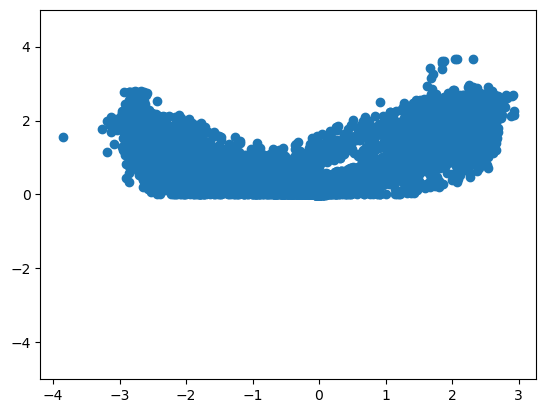

In [6]:
filtered_data = data[(data["throttle"] >= -0.01) & (data["throttle"] <= 0.5)]
filtered_data["steer"] = filtered_data["steer"].abs()
# filtered_data['w'] = filtered_data['w'].abs()

plt.scatter(filtered_data["w"], filtered_data["v"]*np.tan(filtered_data["steer"]*0.3)/0.257)
plt.ylim([-5, 5])

In [7]:
from sklearn.datasets import make_regression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.neural_network import MLPRegressor

In [10]:
w_est = filtered_data["v"]*np.tan(filtered_data["steer"]*0.3)/0.257
df_x = filtered_data[["accel", "v", "steer"]]

df_y = filtered_data["throttle"]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    df_x.to_numpy(), df_y.to_numpy(), test_size=0.05, random_state=33
)
clf = MLPRegressor(random_state=1, max_iter=1000, hidden_layer_sizes=( 16, 32, 64, 32)).fit(X_train, y_train.reshape(-1))

print(clf.score(X_train, y_train))

y_pred = clf.predict(X_test)
print(mean_squared_error(y_test, y_pred))



0.7434039850748526
0.003351004545204741


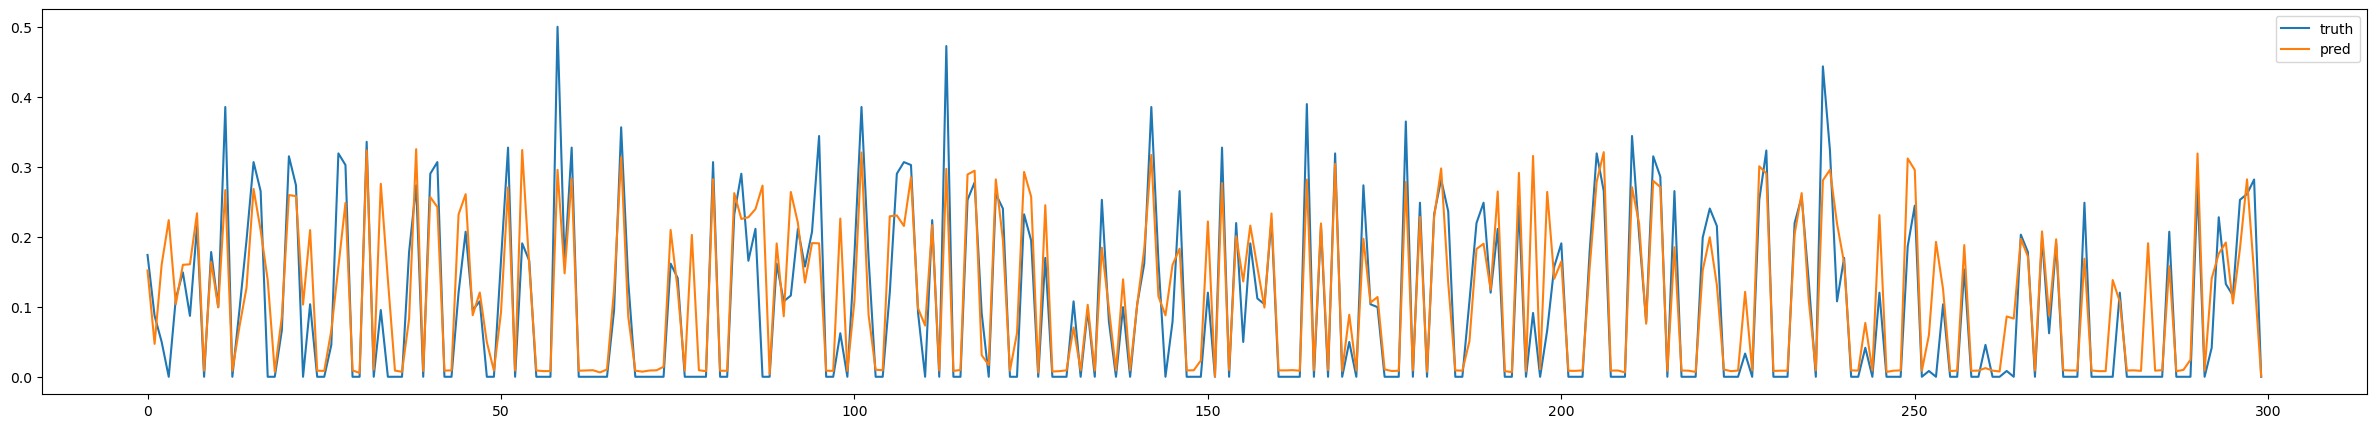

In [20]:
plt.figure().set_size_inches((30, 5))
plt.plot(y_test[200:500], label="truth")
plt.plot(y_pred[200:500], label="pred")
plt.legend()
plt.show()

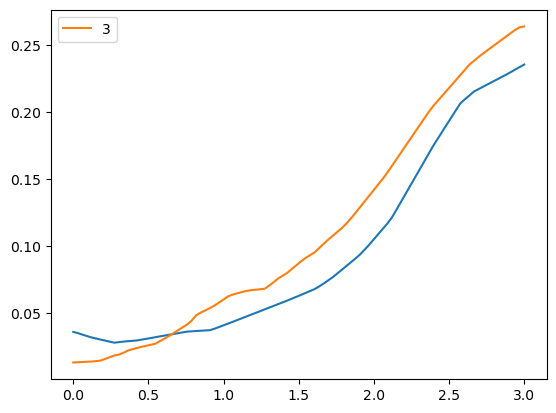

In [22]:
x_test1 = np.zeros((100,3))
x_test1[:,1] = np.linspace(0, 3, 100) # velocity
x_test1[:,0] = -5 #accel


y = clf.predict(x_test1)
plt.plot(x_test1[:,1], y)

x_test1[:,0] = -1 #accel


y = clf.predict(x_test1)
plt.plot(x_test1[:,1], y, label="3")


# x_test1[:,-1] = 1
# y2 = clf.predict(x_test1)
# plt.plot(x_test1[:,1], y2, label='steer=1')

# x_test1[:,-1] = 0.7
# y2 = clf.predict(x_test1)
# plt.plot(x_test1[:,1], y2, label='steer=0.3')


plt.legend()

In [24]:
import pickle
model_name = "mlp_model.sav"
pickle.dump(clf, open(model_name, 'wb'))

In [132]:
clf = pickle.load(open(model_name, 'rb'))